Data Loading and Cleaning

In [ ]:
import pandas as pd


In [ ]:

# Load the CSV file
file_path = '/content/Cleaned dataset Financial Analysis.csv'
df = pd.read_csv(file_path)


In [ ]:

# Check if MarketCap column exists and clean data if necessary
if 'MarketCap' in df.columns:
    # Drop rows with missing MarketCap values
    df = df.dropna(subset=['MarketCap'])

    # Convert MarketCap to numeric if it's not already
    df['MarketCap'] = pd.to_numeric(df['MarketCap'], errors='coerce')

    # Calculate summary statistics
    avg_marketcap = df['MarketCap'].mean()
    min_marketcap = df['MarketCap'].min()
    max_marketcap = df['MarketCap'].max()

    print(f"AvgMarketCap: {avg_marketcap}")
    print(f"MinMarketCap: {min_marketcap}")
    print(f"MaxMarketCap: {max_marketcap}")

    # Add these as new rows or a new summary CSV
    summary_data = {
        'Statistic': ['AvgMarketCap', 'MinMarketCap', 'MaxMarketCap'],
        'MarketCap': [avg_marketcap, min_marketcap, max_marketcap]
    }
    summary_df = pd.DataFrame(summary_data)
    summary_df.to_csv('marketcap_summary.csv', index=False)


In [ ]:
pip install pandas matplotlib


In [ ]:
import pandas as pd

# Load your dataset
file_path = '/content/Cleaned dataset Financial Analysis.csv'
data = pd.read_csv(file_path)

# Check the first few rows to ensure data is loaded correctly
print(data.head())


         Date Symbol  Adj Close     Close      High       Low      Open  \
0  15-09-2014    MMM    86.2321  120.8027  120.9783  120.1171  120.5435   
1  15-09-2014    AOS    20.9836   24.4900   24.5900   24.3750   24.4750   
2  15-09-2014    ABT    35.2860   42.7200   42.7800   42.4400   42.6100   
3  15-09-2014   ABBV    38.3204   57.9300   58.1500   57.4700   57.7500   
4  15-09-2014    ACN    67.6868   80.6000   81.1500   80.4500   80.9900   

    Volume       Sector                         Industry  Currentprice  \
0  2234128  Industrials                    Conglomerates        132.03   
1   793200  Industrials   Specialty Industrial Machinery         79.40   
2  3067500   Healthcare                  Medical Devices        116.83   
3  8632700   Healthcare     Drug Manufacturers - General        194.02   
4  1949200   Technology  Information Technology Services        349.89   

      Marketcap  Revenuegrowth    Weight   S&P500  
0   72531206144         -0.004  0.001397  1984.13  


Market Capitalization Summary (Bar Chart)

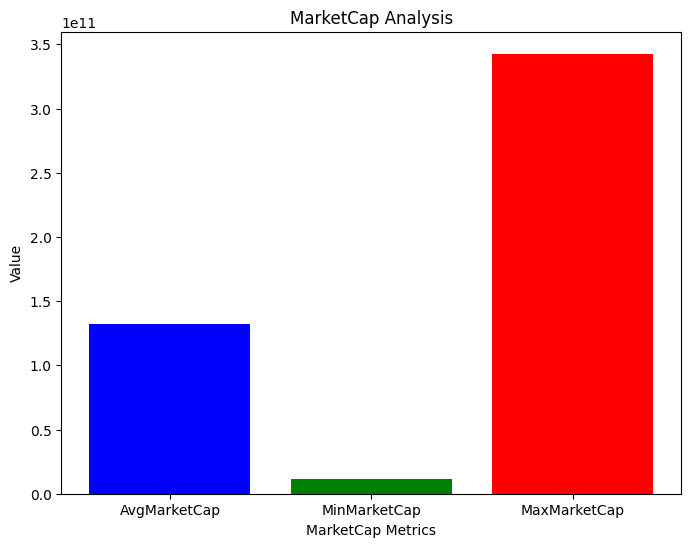

In [ ]:
import matplotlib.pyplot as plt

# Example of calculated Avg, Min, Max values for MarketCap
avg_market_cap = 132569920455.5316
min_market_cap = 11580092416
max_market_cap = 342705000000

# Create a bar chart
metrics = ['AvgMarketCap', 'MinMarketCap', 'MaxMarketCap']
values = [avg_market_cap, min_market_cap, max_market_cap]

plt.figure(figsize=(8,6))
plt.bar(metrics, values, color=['blue', 'green', 'red'])
plt.xlabel('MarketCap Metrics')
plt.ylabel('Value')
plt.title('MarketCap Analysis')
plt.show()


S&P 500 Yearly Trend (Line Chart)


<ipython-input-1-c0cdc1c2c056>:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


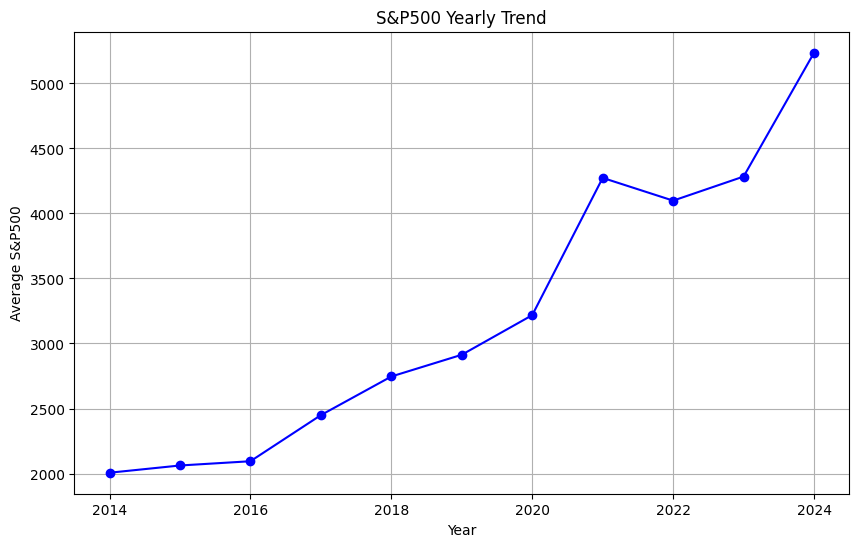

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Cleaned dataset Financial Analysis.csv'
data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract the year from the date
data['Year'] = data['Date'].dt.year

# Group by year and calculate the average S&P 500 for each year
yearly_sp500 = data.groupby('Year')['S&P500'].mean()

# Create a line chart
plt.figure(figsize=(10,6))
plt.plot(yearly_sp500.index, yearly_sp500.values, marker='o', linestyle='-', color='blue')
plt.xlabel('Year')
plt.ylabel('Average S&P500')
plt.title('S&P500 Yearly Trend')
plt.grid(True)
plt.show()


Top 5 Stocks by Growth (Bar Chart)

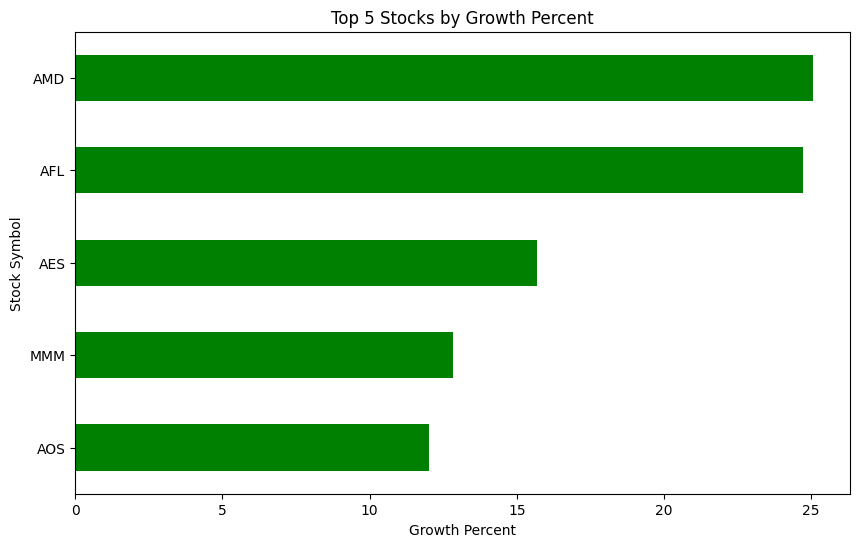

In [ ]:
# Assuming GrowthPercent is already calculated in your dataset, else calculate it
data['GrowthPercent'] = (data['Close'] - data['Open']) / data['Open'] * 100

# Group by StockSymbol and calculate the maximum growth percent for each stock
stock_growth = data.groupby('Symbol')['GrowthPercent'].max().sort_values(ascending=False).head(5)

# Create a horizontal bar chart
plt.figure(figsize=(10,6))
stock_growth.plot(kind='barh', color='green')
plt.xlabel('Growth Percent')
plt.ylabel('Stock Symbol')
plt.title('Top 5 Stocks by Growth Percent')
plt.gca().invert_yaxis()  # Invert y-axis to display highest at the top
plt.show()


Industry-Wise Market Capitalization (Bar Chart)

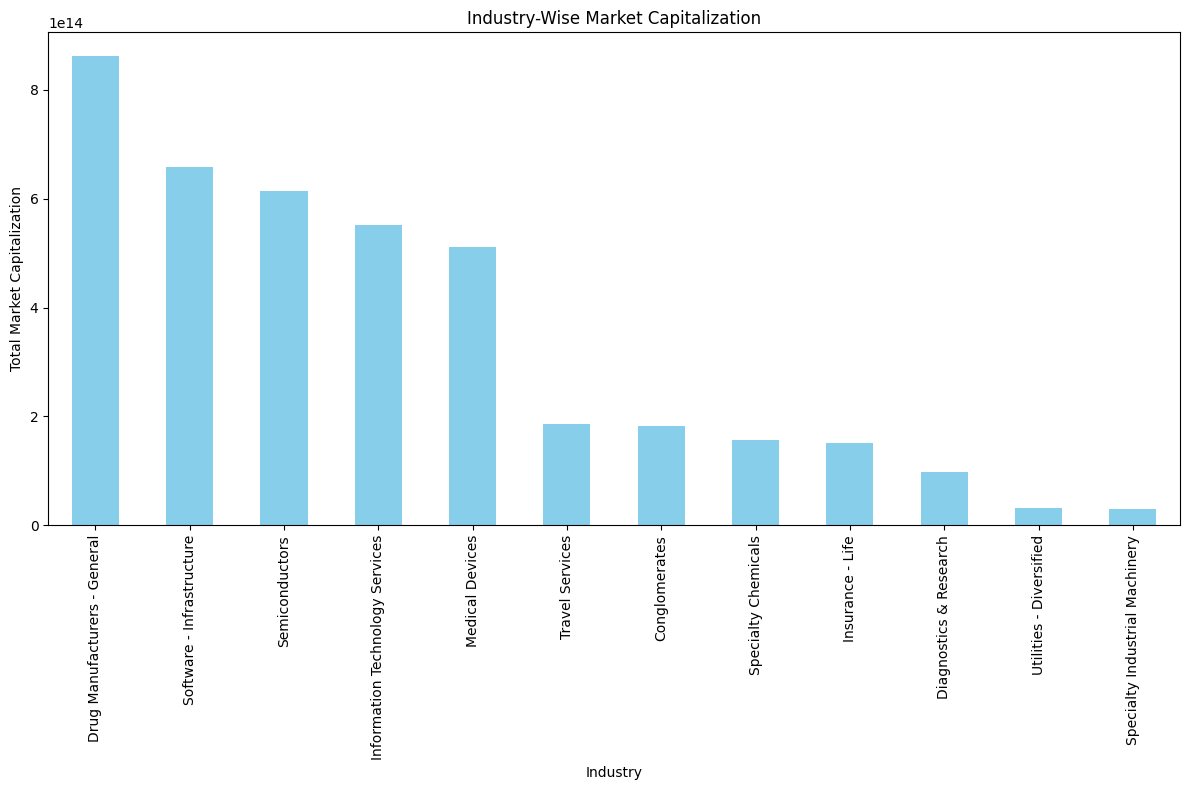

In [ ]:
# Group by Industry and calculate the total MarketCap for each industry
industry_marketcap = data.groupby('Industry')['Marketcap'].sum().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12,8))
industry_marketcap.plot(kind='bar', color='skyblue')
plt.xlabel('Industry')
plt.ylabel('Total Market Capitalization')
plt.title('Industry-Wise Market Capitalization')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Stock Volatility (Box Plot)

<Figure size 1200x800 with 0 Axes>

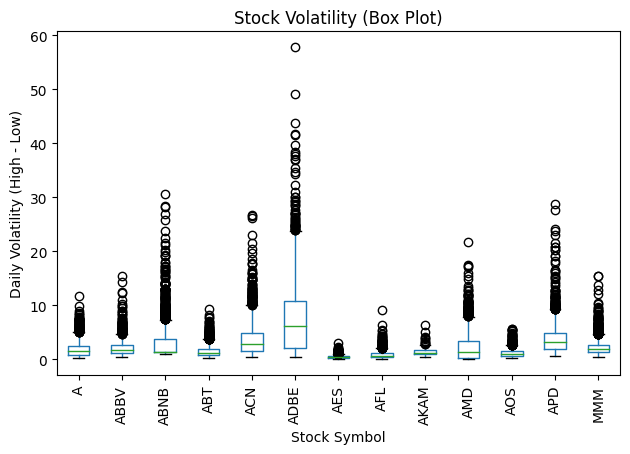

In [ ]:
# Calculate the daily volatility for each stock (High - Low)
data['DailyVolatility'] = data['High'] - data['Low']

# Create a box plot for stock volatility
plt.figure(figsize=(12,8))
data.boxplot(column='DailyVolatility', by='Symbol', grid=False)
plt.xlabel('Stock Symbol')
plt.ylabel('Daily Volatility (High - Low)')
plt.title('Stock Volatility (Box Plot)')
plt.suptitle('')  # Suppress the default title
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Revenue Growth by Symbol (Bar Chart)


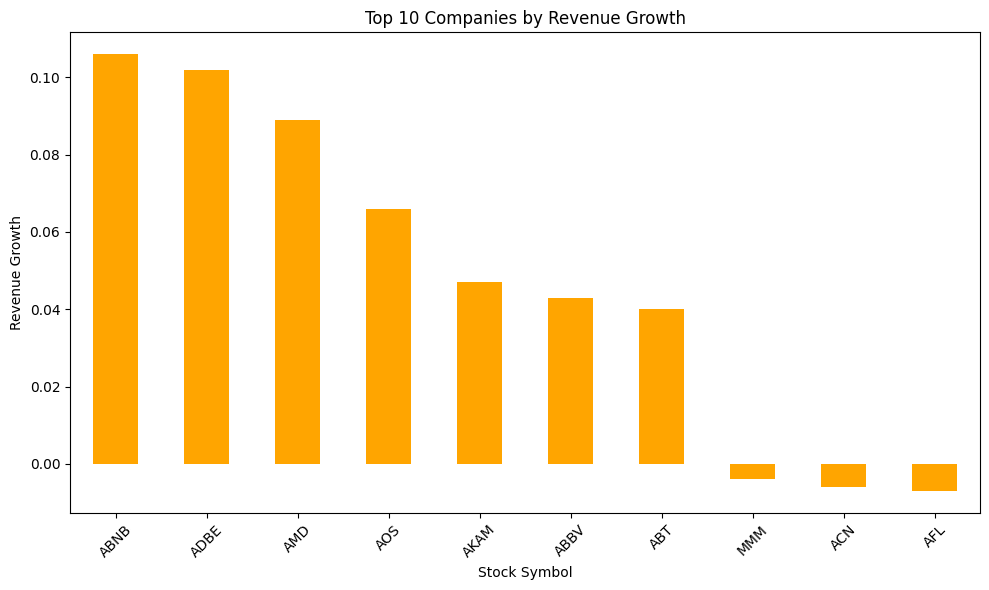

In [ ]:
# Assuming RevenueGrowth column exists in the dataset
# Group by Symbol and calculate the maximum RevenueGrowth for each symbol
revenue_growth = data.groupby('Symbol')['Revenuegrowth'].max().sort_values(ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(10,6))
revenue_growth.plot(kind='bar', color='orange')
plt.xlabel('Stock Symbol')
plt.ylabel('Revenue Growth')
plt.title('Top 10 Companies by Revenue Growth')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
